### Import necessary libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt

### ================================
### Step 1: Generate Synthetic Data
### ================================

In [50]:
np.random.seed(42)
N = 500  # Total data points
d = 12   # Number of features
train_ratio = 0.7
val_ratio = 0.15

# Generate feature matrix and true weights
X = np.random.normal(0, 1, (N, d))
true_weights = np.linspace(1, 5, d)  # Linearly spaced true weights
epsilon = np.random.normal(0, 0.5, N)  # Noise
y = X @ true_weights + epsilon  # Generate target values

# Split data into train, validation, and test sets
train_size = int(N * train_ratio)
val_size = int(N * val_ratio)
test_size = N - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

### ================================
### Step 2: Ridge Regression Functions
### ================================

In [51]:
def ridge_loss(w, X, y, lam):
    """Calculate the ridge regression loss."""
    residuals = y - X @ w
    return np.sum(residuals**2) + lam * np.sum(w**2) 

def ridge_gradient(w, X, y, lam):
    """Calculate the gradient of the ridge regression loss."""
    residuals = y - X @ w
    grad = - 2 * X.T @ residuals + 2* lam * w
    grad = grad/len(y)
    return grad

def gradient_descent(loss_fn, grad_fn, w_init, X, y, lam, lr=0.01, tol=1e-6, max_iters=1000):
    """Perform gradient descent to minimize the ridge regression loss."""
    w = w_init
    for i in range(max_iters):
        grad = grad_fn(w, X, y, lam)
        w_new = w - lr * grad
        if np.linalg.norm(w_new - w, ord=2) < tol:
            break
        w = w_new
    return w

### ================================
### Step 3: Variance and Bias Calculation
### ================================

In [52]:
def calculate_bias_variance(X_train, y_train, X_val, y_val, lambdas, num_datasets=20,
                            sub_sample_size=50):
    """
    Calculate the bias and variance for ridge regression models trained on multiple datasets.
    """
    biases, variances = [], []
    for lam in lambdas:
        predictions = []
        for _ in range(num_datasets):
            # Sample with replacement
            indices = np.random.choice(len(X_train), size=sub_sample_size, replace=True)
            X_sample, y_sample = X_train[indices], y_train[indices]
            
            # Train ridge regression
            w_init = np.zeros(d)
            w = gradient_descent(ridge_loss, ridge_gradient, w_init, X_sample, y_sample, lam)
            
            # Predict on validation data
            predictions.append(X_val @ w)
        
        # Average predictions
        predictions = np.array(predictions)
        mean_prediction = np.mean(predictions, axis=0)
        bias = np.mean((mean_prediction - y_val)**2)
        variance = np.mean(np.var(predictions, axis=0))
        
        biases.append(bias)
        variances.append(variance)
    
    return biases, variances

In [53]:
lambdas = [a * 10**b for a in range(1, 10) for b in range(-5, 3)]  # For λ values
lambdas.sort()

### ================================
### Step 4: Plotting Functions
### ================================

In [64]:
# Empty sections for students to complete    
def plot_coefficients_vs_lambda():
    """Plot the learned coefficients for different lambda values."""
    coeffs = []
    for lam in lambdas:
        w_init = np.zeros(d)
        w_opt = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, lam)
        coeffs.append(w_opt)

    coeffs = np.array(coeffs)  # Convert to numpy array for plotting
    plt.figure(figsize=(8, 5))
    plt.plot(lambdas, coeffs)
    plt.xscale("log")  # Log scale for lambda
    plt.xlabel("Lambda (log scale)")
    plt.ylabel("Coefficient Values")
    plt.title("Coefficient Values vs. Lambda")
    plt.grid()
    plt.savefig("coefficients_vs_lambda.png")
    plt.show()


def plot_rmse_vs_lambda():
    """Plot RMSE on validation data vs lambda."""
    rmse_values = []
    for lam in lambdas:
        w_init = np.zeros(d)
        w_opt = gradient_descent(ridge_loss, ridge_gradient, w_init, X_train, y_train, lam)
        y_pred = X_val @ w_opt
        rmse = np.sqrt(np.mean((y_val - y_pred) ** 2))
        rmse_values.append(rmse)

    optimal_lambda = lambdas[np.argmin(rmse_values)]  # Find lambda that minimizes RMSE


    plt.figure(figsize=(8, 5))
    plt.plot(lambdas, rmse_values)
    plt.plot(optimal_lambda, min(rmse_values), 'ro')  # Highlight optimal lambda
    plt.xscale("log")
    plt.xlabel("Lambda (log scale)")
    plt.ylabel("Validation RMSE")
    plt.title(f"Validation RMSE vs. Lambda (Best λ = {optimal_lambda:.2e})")
    plt.grid()
    plt.savefig("rmse_vs_lambda.png")
    plt.show()
    
    return optimal_lambda  # Return best lambda

# def plot_predicted_vs_true():
def plot_predicted_vs_true(lambda_opt):
    """Plot predicted vs true values using optimal lambda."""
    w_init = np.zeros(d)
    w_opt = gradient_descent(ridge_loss, ridge_gradient, w_init, np.vstack((X_train, X_val)), np.hstack((y_train, y_val)), lambda_opt)
    
    y_pred = X_test @ w_opt  # Predict test values

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")  # 45-degree reference line
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs True Values")
    plt.grid()
    plt.savefig("predicted_vs_true.png")
    plt.show()

    

# def plot_bias_variance_tradeoff():
def plot_bias_variance_tradeoff():
    """Plot bias and variance vs lambda."""
    biases, variances = calculate_bias_variance(X_train, y_train, X_val, y_val, lambdas)

    plt.figure(figsize=(8, 5))
    plt.plot(lambdas, biases, label="Bias")
    plt.plot(lambdas, variances, label="Variance")
    plt.xscale("log")
    plt.xlabel("Lambda (log scale)")
    plt.ylabel("Variance")
    plt.title("Variance Tradeoff")
    plt.legend()
    plt.grid()
    plt.savefig("bias_variance_tradeoff.png")
    plt.show()

### ================================
### Step 5: Main Execution
### ================================

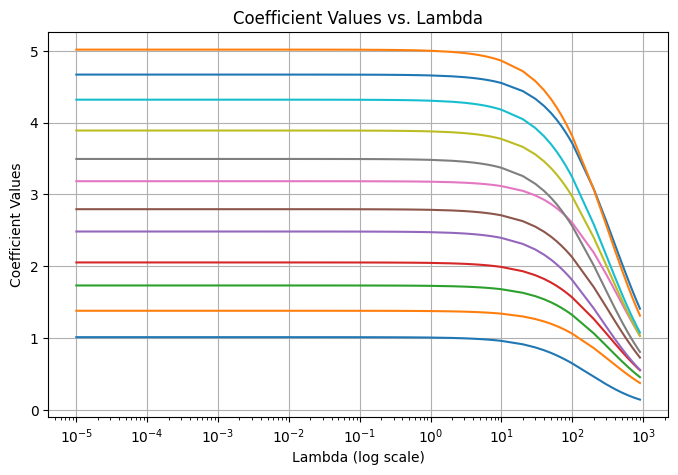

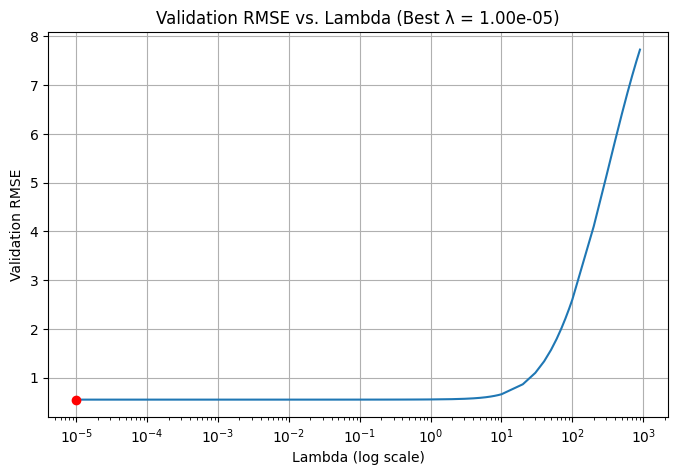

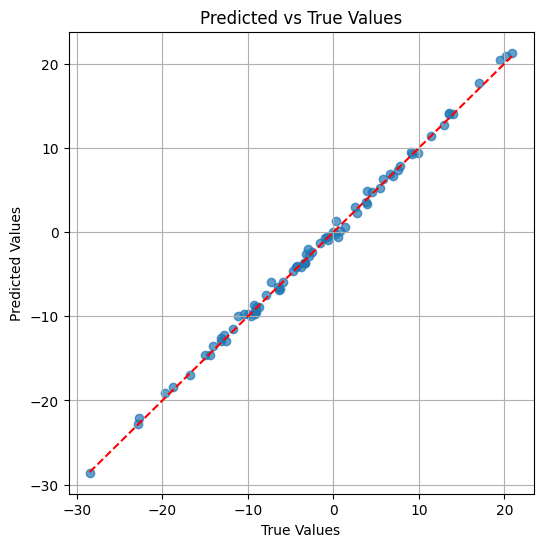

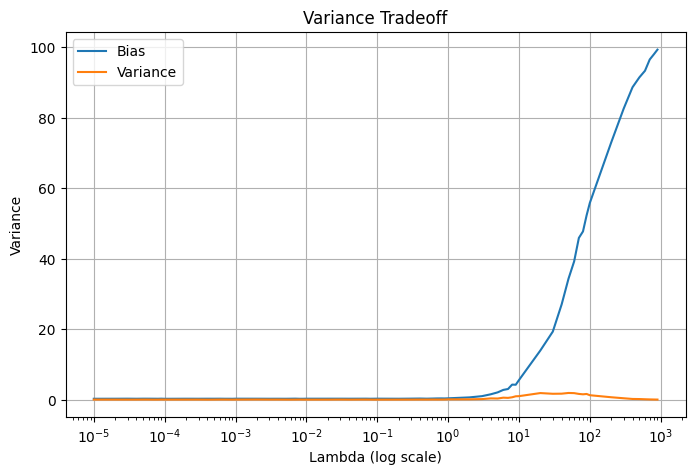

In [65]:
plot_coefficients_vs_lambda()
best_lambda = plot_rmse_vs_lambda()
plot_predicted_vs_true(best_lambda)
plot_bias_variance_tradeoff()


### ================================
### Analysis
### ================================

#### 1. **How coefficients behave as λ increases.**

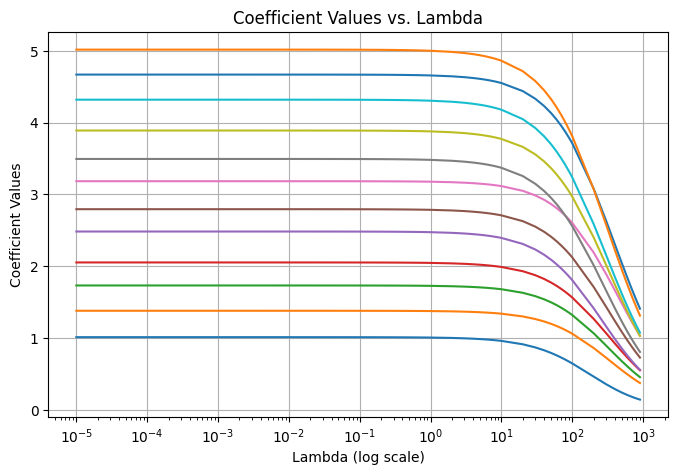

- The small values of 𝜆 the coefficients take on their unrestricted values, this indicates that the model behaves like ordinary least squares (OLS), while as λ increases, the coefficients tends to go towards zero. This is an effect of the ridge regression penalty that discourages large coeeficint values to prevent overfitting.
- For the high values of 𝜆, all coefficients approach zero, this indicates that the model is being constrainde which leads to underfitting.

#### 2. **The trade-off between RMSE and λ.**
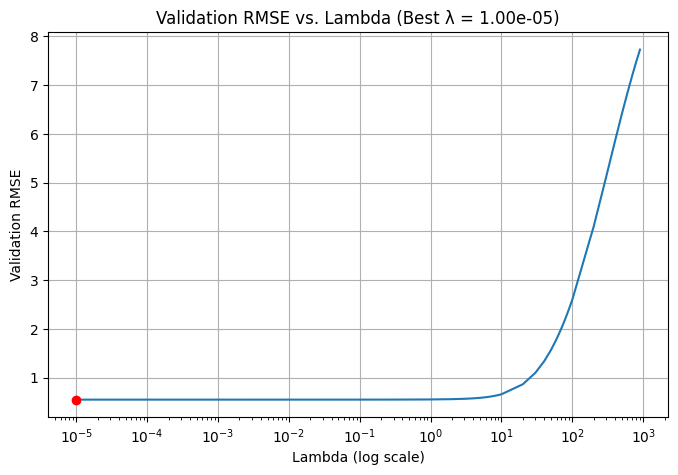

- At very small 𝜆, RMSE is low,  ths indicates that the model fits the data well. As it increases, RMSE remains low for a while, this shows the region where the model generalizes well.However, as 𝜆 increases, RMSE starts increasing sharply, indicating underfitting since the model becomes too simple and fails to capture the data complexity. 
- The red dot marks indicates an optimal 𝜆, that achieves the lowest RMSE on the validation set. This represents the best balance between bias and variance.

#### 3. **Observations from the bias-variance trade-off plot.**
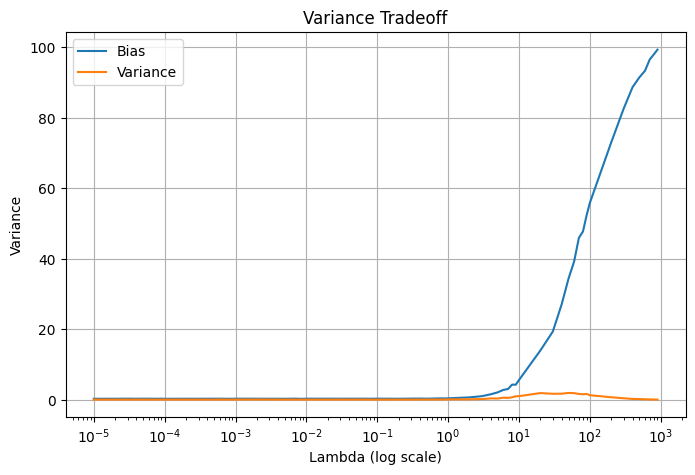

- For very small values of 𝜆, variance is high, as bias remains low. This could indicate to a very flexible model that might lead to overfitting the training data. However, as 𝜆 increases, variance decreases because the model becomes more constrained, reducing sensitivity to noise.
- Bias also starts increasing at higher λ values as the model becomes too simple to capture the underlying pattern.
- The most ideal 𝜆 is in the region where variance is controlled without significantly increasing bias.